In [49]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import copy
import math
from scipy import stats
from scipy.signal import butter, lfilter
import statistics
import scipy.linalg as la
from scipy.signal import periodogram

In [3]:
data_path = os.path.join(
                    os.getcwd(),
                    'dataset_fog_release',
                    'dataset'
)
if not os.path.exists(data_path):
    print("Path Error")

Creating our pre-fog data using the previous    <b>w * f_s</b>     to create our third class to predict FoG

In [ ]:
def label_prefog(dataset, window_length = 1):
    # Drop all the rows for which Action is 0 or the rows which are not part of the experiment
    dataset.drop(index = list(dataset[dataset['Action'] == 0].index),
                 inplace = True)
    
    window_length = 64*window_length
    
    fog_index = []
    for i in dataset.index:
        if dataset.loc[i, 'Action'] == 2:
            fog_index.append(i)
    fog_index
    
    
    start_indices = []
    for i in fog_index:
        if (dataset.loc[i-1, 'Action'] != dataset.loc[i, 'Action']):
            start_indices.append(i)
    
    prefog = []
    for start in start_indices:
        prefog_start = [x for x in range(start-window_length, start)]
        prefog.append(prefog_start)
        
    prefog = [item for sublist in prefog for item in sublist]
    
    for i in prefog:
        dataset.loc[i,'Action'] = 3
    dataset['Action'] = dataset['Action'] - 1
    return dataset
    

In [ ]:
people = []

for person in os.listdir(data_path):
    if '.txt' in person:
        people.append(person)

for window_length in range(1,5):
    dataset = pd.DataFrame()
    for person in people:
        name = person.split('R')[0]
        print(name)
        file = data_path + "\\" + person
        temp = pd.read_csv(file, delimiter = " ", header = None)
        print(person, ' is read', end = "\t")
        
        if 2 in temp[max(temp.columns)].unique():
            print("Adding {} to dataset".format(person), end = "\t")
            temp.columns = [
                            'time',
                            'A_F', 'A_V', 'A_L',
                            'L_F', 'L_V', 'L_L',
                            'T_F', 'T_V', 'T_L',
                            'Action'                           
                           ]
            temp = label_prefog(temp, window_length).reset_index(drop = True)
            temp['name'] = name
            print("{} is labelled".format(person))
            dataset = pd.concat([dataset, temp],axis = 0)
            
        print('')
        
        dataset.reset_index(drop = True, inplace = True)
        to_path = data_path + "\\raw_labelled"
        to_name = to_path + "\\win_" + str(window_length) + ".csv"
        
        dataset.to_csv(to_name, index = False)

display(dataset.head())   
        

In [ ]:
len(people)

In [ ]:
for person in people:
    name = person.split('R')[0]
    print(name)

Extracting non overlapping windows of length w * f_s from the accelerometer dataset

In [ ]:
def create_window(act,window_length,dataframe):
    
  indices = list(dataframe[dataframe.Action == act].index)
  groups = []
  temp = []
  group_count = 0
  for i in range(len(indices)):
    if i == len(indices)-1:
      temp.append(indices[i])
      groups.append(temp)
      temp = []
      break
    temp.append(indices[i])
    if indices[i]+1 != indices[i+1]: 
      group_count+=1
      groups.append(temp)
      temp = []

  fs = 64
  window_length = 1
  # window_length = window_length*fs

  final_dataframe = pd.DataFrame()
  for i in groups: 
    required = math.floor(len(i)/(window_length*fs))
    
    req_index = i[0:(required*fs)]
    
    final_dataframe = pd.concat([final_dataframe,dataframe.iloc[req_index,:]],axis = 0)
  return final_dataframe
            

In [ ]:
for window_length in range(1,5):
  
  path = os.getcwd()+"/dataset_fog_release/dataset"
  name = path+"/raw_labelled/win_"+str(window_length)+".csv"
  dataframe = pd.read_csv(name)

  activities = []
  for act in range(3):
    activities.append(create_window(act,window_length,dataframe))
  to_write = pd.concat(activities,axis = 0)
  to_path = path + "/windows"+"/windowed_"+str(window_length)+".csv"
  to_write.to_csv(to_path,index = False)

## Features to be extracted:
1. Minimum
2. Maximum
3. Median
4. Mean
5. ArmMean
6. Root Mean Square (RMS)
7. GeoMean
8. Variance
9. Standard Deviation
10. Kurtosis
11. Skewness
12. Mode
13. TrimMean
14. Entropy
15. Asymmetry Coefficient
16. Zero Crossing Rate (ZCR)
17. Mean Crossing Rate (MCR)
18. Range


In [12]:
def zcr(array):
    array = np.array(array)
    x =  np.diff((array) > 0)
    return len(np.nonzero(x)[0])

def getZeroCrossingRate(arr):
    my_array = np.array(arr)
    return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))

def getMeanCrossingRate(arr):
    return getZeroCrossingRate(np.array(arr) - np.mean(arr))

def getMode(arr):
    l = []
    for ele in arr:
        l.append(ele)
    return statistics.mode(l)

def geometric_mean(values):
    for i in range(0, len(values)):
        if values[i] == 0:
            del values[i]
        if len(values) == 0:
            return 0
    return np.prod([x for x in values]) ** (1 / len([x for x in values]))

In [14]:
window_length = 1
f_s = 64
w = window_length * f_s

FE_path = data_path + "/windows/windowed_"
name = FE_path + str(window_length) + ".csv"
dataframe = pd.read_csv(name)
df = dataframe.drop(columns = ['time', 'Action', 'name'])
statistics = pd.DataFrame()

col = list(df.columns)
for column in col:
    print(column)

    f1 = []
    f2 = []
    f3 = []
    f4 = []
    f5 = []
    f6 = []
    f7 = []
    f8 = []
    f9 = []
    f10 = []
    f11 = []
    f12 = []
    f13 = []
    f14 = []
    f15 = []
    f16 = []
    f17 = []
    f18 = []

    for i in range(0, len(df), w):
        f_1 = min(df[column].iloc[i:i+w])
        f_2 = max(df[column].iloc[i:i+w])
        f_3 = np.median(df[column].iloc[i:i+w])
        f_4 = np.mean(df[column].iloc[i:i+w])
        f_5 = stats.hmean(abs(df[column].iloc[i:i+w]))
    
        f_6 = np.sqrt(np.mean(df[column].iloc[i:i+w]**2))
   
#        f_7 = geometric_mean(df[column].iloc[i:i+w])
        f_8 = np.var(df[column].iloc[i:i+w])
        f_9 = np.std(df[column].iloc[i:i+w])
        f_10 = stats.kurtosis(df[column].iloc[i:i+w])
        f_11 = stats.skew(df[column].iloc[i:i+w])
        #f_12 = getMode(df[column].iloc[i:i+w])
        f_13 = stats.tmean(df[column].iloc[i:i+w])
        #f_14 = stats.entropy(df[column].iloc[i:i+w])
        f_15 = df[column].iloc[i] / np.std(df[column].iloc[i:i+w])
        f_16 = getZeroCrossingRate(df[column].iloc[i:i+w])
        f_17 = getMeanCrossingRate(df[column].iloc[i:i+w])
        f_18 = f_2 - f_1
        
        
        f1.append(f_1)
        f2.append(f_2)
        f3.append(f_3)
        f4.append(f_4)
        f5.append(f_5)
        f6.append(f_6)
        #f7.append(f_7)
        f8.append(f_8)
        f9.append(f_9)
        f10.append(f_10)
        f11.append(f_11)
#         f12.append(f_12)
        f13.append(f_13)
        #f14.append(f_14)
        f15.append(f_15)
        f16.append(f_16)
        f17.append(f_17)
        f18.append(f_18)
    
    statistics['Minimum_' + column] = f1
    statistics['Maximum_' + column] = f2
    statistics['Median_' + column] = f3
    statistics['Mean_' + column] = f4
    statistics['ArmMean_' + column] = f5
    statistics['RMS_' + column] = f6
    #statistics['GeometricMean_' + column] = f7
    statistics['Variance_' + column] = f8
    statistics['STD_' + column] = f9
    statistics['Kurtosis_' + column] = f10
    statistics['Skewness_' + column] = f11
    #statistics['Mode_' + column] = f12
    statistics['TrimMean_' + column] = f13
    #statistics['Entropy_' + column] = f14
    statistics['AsymmetryCoefficient_' + column] = f15
    statistics['ZCR_' + column] = f16
    statistics['MCR_' + column] = f17
    statistics['Range' + column] = f18    

print("The shape of the dataset is: ", statistics.shape)


A_F


c:\python37\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


A_V
A_L
L_F
L_V
L_L
T_F
T_V
T_L
The shape of the dataset is:  (12658, 135)


In [15]:
statistics1 = copy.copy(statistics)
statistics1['w'] = dataframe['Action'].iloc[[x for x in range(0, len(dataframe), w)]].to_list()
order = ['w']
order += statistics1.columns.to_list()[:-1]
statistics1 = statistics1[order]
statistics1.columns
col = statistics1.columns.to_list()
col[0] = 0
statistics1.columns = col
feature_name = data_path + "/features/time_" + str(window_length) + ".csv"
statistics1.to_csv(feature_name, index = False) 

In [ ]:
# #read file 
# window_length = 1
# fs = 64
# # for window_length in range(1,5):
# w = window_length*fs
# FE_path = data_path + "/windows/windowed_"
# name = FE_path + str(window_length) + ".csv"
# dataframe = pd.read_csv(name)

# df = dataframe.drop(columns=['time','Action','name'])
# stat = pd.DataFrame()


# col= list(df.columns)
# for s in col:    
#   print (s)
#   mn =[] 
#   var = []
#   std = []
#   mav = []
#   rms =[]
#   for i in range(0,len(df),w):
#       mn_  = np.mean(df[s].iloc[i:i+w])
#       var_  = np.var(df[s].iloc[i:i+w])
#       std_  = np.std(df[s].iloc[i:i+w])
#       mav_  = np.mean(abs(df[s].iloc[i:i+w]))
#       rms_  = np.sqrt(np.mean((df[s].iloc[i:i+w])**2))

#       mn.append(mn_)
#       var.append(var_)
#       std.append(std_)
#       mav.append(mav_)
#       rms.append(rms_)

#   stat['mean_'+s] = mn
#   stat['var_'+s] = var
#   stat['std_'+s] = std
#   stat['rms_'+s] = rms
#   stat['mav_'+s] = mav


# stat.shape


# import copy
# stat1 = copy.copy(stat)
# stat1['w'] = dataframe['Action'].iloc[[x for x in range(0,len(dataframe),w)]].to_list()
# order = ['w']
# order += stat1.columns.to_list()[:-1]
# stat1 = stat1[order]
# stat1.columns
# col = stat1.columns.to_list()
# col[0] = 0
# stat1.columns = col
# feature_name = data_path + "/features/time_"+str(window_length)+".csv"
# stat1.to_csv(feature_name, index = False)

In [17]:
window_length = 1
f_s = 64
w = window_length * f_s

FE_path = data_path + "/windows/windowed_"
name = FE_path + str(window_length) + ".csv"
dataframe = pd.read_csv(name)
df = dataframe.drop(columns = ['time', 'Action', 'name'])
fi = pd.DataFrame()
power = pd.DataFrame()
order = 5
bands = {'locomotor' : (0.5,3), 'freeze' : (3,8)}
col = list(df.columns)

#print(col)

for column in col:
    xtemp = []
    xtemp1 = []
    for i in range(0, len(df),w):
        nyq = 0.5*f_s             # Nyquist Rate
        
        # LOCOMOTOR HAS A FREQUENCY RANGE OF 0.5Hz - 3Hz FOR TOTAL POWER
        
        loc_low = 0.5 / nyq
        loc_high = 3 / nyq
        
        # Clipping off band from the window
        
        b, a = butter(order, [loc_low, loc_high], btype = 'band')
        y = lfilter(b, a, df[column].iloc[i:i+w])
        
        # Total power in locomotor band
        
        e1 = sum([x**2 for x in y])
        
        
        
        
        # FREEZING BAND HAS A FREQUENCY RANGE OF 3Hz - 8Hz
        
        frez_low = 3 / nyq
        frez_high = 8 / nyq
               
        # Clipping off band from the window
        
        b1, a1 = butter(order, [frez_low, frez_high], btype = 'band')
        y1 = lfilter(b1, a1, df[column].iloc[i:i+w])
        
        # Total power in freezing band
        
        e2 = sum([x**2 for x in y1])
        
        freezing_index = e2/e1
        pwr = e2 + e1
        
        xtemp.append(freezing_index)
        xtemp1.append(pwr)
         
    print(column + " done", end = " ")
        
    fi['FI_' + column] = xtemp
    power['P_' + column] = xtemp1

print(" Freezing Index and Power has been calculated")

E = []

for i in range(0, len(df), w):
    energy = np.sum((df.iloc[i:i + w,:])**2)
    E.append(energy)
    
E = pd.DataFrame(E)

E.columns = ["EN_" + x for x in df.columns]

peak_f = pd.DataFrame()
PSE = pd.DataFrame()
for s in col:
  peakF = []
  pse = []
  for i in range(0,len(df),w):
      f,Pxx_den = periodogram(df[s].iloc[i:i+w],w)
      p_norm = Pxx_den/sum(Pxx_den)
      p_norm = list(filter(lambda a: a != 0, p_norm))
      pse.append(-(np.sum(p_norm*np.log(p_norm))))
      peak = (f_s/w)*max(Pxx_den)
      peakF.append(peak)
  PSE['ENt_'+s] = pse
  peak_f['peak_'+s] = peakF
PSE.fillna(0,inplace = True)

freq = pd.concat([fi, power, E, peak_f, PSE], axis = 1)

print(freq.shape)
feature_name = data_path + "/features/freq_" + str(window_length) + ".csv"

freq.to_csv(feature_name, index = False)    

A_F done A_V done A_L done L_F done L_V done L_L done T_F done T_V done T_L done  Freezing Index and Power has been calculated


c:\python37\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


(12658, 45)


### Calculating Average Acceleration Energy (AAE)

In [21]:
file = os.path.join(data_path,'features','freq_1.csv')
if os.path.exists(file):
    print(True)

True


In [22]:
df = pd.read_csv(file)
df.columns

Index(['FI_A_F', 'FI_A_V', 'FI_A_L', 'FI_L_F', 'FI_L_V', 'FI_L_L', 'FI_T_F',
       'FI_T_V', 'FI_T_L', 'P_A_F', 'P_A_V', 'P_A_L', 'P_L_F', 'P_L_V',
       'P_L_L', 'P_T_F', 'P_T_V', 'P_T_L', 'EN_A_F', 'EN_A_V', 'EN_A_L',
       'EN_L_F', 'EN_L_V', 'EN_L_L', 'EN_T_F', 'EN_T_V', 'EN_T_L', 'peak_A_F',
       'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L', 'peak_T_F',
       'peak_T_V', 'peak_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L', 'ENt_L_F',
       'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L'],
      dtype='object')

In [66]:
AAE_A = []
AAE_L = []
AAE_T = []



total_rows = df[df.columns[0]].count()
for i in range(0, total_rows):
    mean_A =  np.mean(df.iloc[i,18:21])
    mean_L =  np.mean(df.iloc[i,21:24])
    mean_T =  np.mean(df.iloc[i,24:27])
    
    AAE_A.append(mean_A)
    AAE_L.append(mean_L)
    AAE_T.append(mean_T)

ftrs = pd.DataFrame(AAE_A, AAE_L, AAE_T)

ValueError: Shape of passed values is (810112, 1), indices imply (810112, 810112)

In [59]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)
# def cov_mat(X):
#     return np.array([
#         [cov(X[0], X[0]), cov(X[0], X[1]), cov(X[0], X[2]), cov(X[0], X[3]), cov(X[0], X[4]), cov(X[0], X[5])],cov(X[0], X[6]), cov(X[0], X[7])], 
#         [cov(X[1], X[0]), cov(X[1], X[1]), cov(X[1], X[2]), cov(X[1], X[3]), cov(X[1], X[4]), cov(X[1], X[5])],cov(X[1], X[6]), cov(X[1], X[7])], 
#         [cov(X[2], X[0]), cov(X[2], X[1]), cov(X[2], X[2]), cov(X[2], X[3]), cov(X[2], X[4]), cov(X[2], X[5])],cov(X[2], X[6]), cov(X[2], X[7])], 
#         [cov(X[3], X[0]), cov(X[3], X[1]), cov(X[3], X[2]), cov(X[3], X[3]), cov(X[3], X[4]), cov(X[3], X[5])],cov(X[3], X[6]), cov(X[3], X[7])], 
#         [cov(X[4], X[0]), cov(X[4], X[1]), cov(X[4], X[2]), cov(X[4], X[3]), cov(X[4], X[4]), cov(X[4], X[5])],cov(X[4], X[6]), cov(X[4], X[7])], 
#         [cov(X[5], X[0]), cov(X[5], X[1]), cov(X[5], X[2]), cov(X[5], X[3]), cov(X[5], X[4]), cov(X[5], X[5])],cov(X[5], X[6]), cov(X[5], X[7])], 
#         [cov(X[6], X[0]), cov(X[6], X[1]), cov(X[6], X[2]), cov(X[6], X[3]), cov(X[6], X[4]), cov(X[6], X[5])],cov(X[6], X[6]), cov(X[6], X[7])], 
#         [cov(X[7], X[0]), cov(X[7], X[1]), cov(X[7], X[2]), cov(X[7], X[3]), cov(X[7], X[4]), cov(X[7], X[5])],cov(X[7], X[6]), cov(X[7], X[7])]
#         ])
        
def cov_mat(X):
    return np.array([
        [cov(X[0], X[0]), cov(X[0], X[1]), cov(X[0], X[2]), cov(X[0], X[3]), cov(X[0], X[4]), cov(X[0], X[5]), cov(X[0], X[6]), cov(X[0], X[7])],
        [cov(X[1], X[0]), cov(X[1], X[1]), cov(X[1], X[2]), cov(X[1], X[3]), cov(X[1], X[4]), cov(X[1], X[5]), cov(X[1], X[6]), cov(X[1], X[7])],
        [cov(X[2], X[0]), cov(X[2], X[1]), cov(X[2], X[2]), cov(X[2], X[3]), cov(X[2], X[4]), cov(X[2], X[5]), cov(X[2], X[6]), cov(X[2], X[7])],
        [cov(X[3], X[0]), cov(X[3], X[1]), cov(X[3], X[2]), cov(X[3], X[3]), cov(X[3], X[4]), cov(X[3], X[5]), cov(X[3], X[6]), cov(X[3], X[7])],
        [cov(X[4], X[0]), cov(X[4], X[1]), cov(X[4], X[2]), cov(X[4], X[3]), cov(X[4], X[4]), cov(X[4], X[5]), cov(X[4], X[6]), cov(X[4], X[7])],
        [cov(X[5], X[0]), cov(X[5], X[1]), cov(X[5], X[2]), cov(X[5], X[3]), cov(X[5], X[4]), cov(X[5], X[5]), cov(X[5], X[6]), cov(X[5], X[7])],
        [cov(X[6], X[0]), cov(X[6], X[1]), cov(X[6], X[2]), cov(X[6], X[3]), cov(X[6], X[4]), cov(X[6], X[5]), cov(X[6], X[6]), cov(X[6], X[7])],
        [cov(X[7], X[0]), cov(X[7], X[1]), cov(X[7], X[2]), cov(X[7], X[3]), cov(X[7], X[4]), cov(X[7], X[5]), cov(X[7], X[6]), cov(X[7], X[7])],
                    ])
        
        
        
        
        
        
        
    
                     

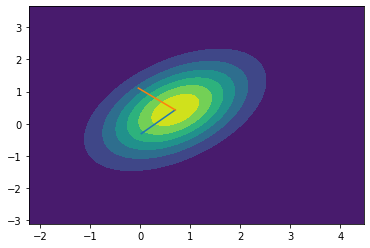

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as la

# Generate a positive-definite covariance matrix & generate data
A          = np.random.random([2,2])
cov_given  = np.dot(A,A.T)
mean_given = np.random.random([2])
data       = np.random.multivariate_normal(mean_given,cov_given,10000)

# Find the numerical mean and covariance, diagonalize
mean = np.mean(data, axis = 0 )
cov  = np.cov(data.T)
w, v = la.eig(cov)

# Plotting procedures
fig, ax = plt.subplots()
xmin, ymin = np.min(data,axis=0)
xmax, ymax = np.max(data,axis=0)
# xmin, ymin = -3, -3
# xmax, ymax = 3, 3
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos  = np.dstack((x, y))
ax.contourf(x,y, multivariate_normal(mean=mean, cov=cov).pdf(pos))
ax.plot([mean[0], mean[0] + v[0][1]],[mean[1],mean[1] + v[1][1]])
ax.plot([mean[0], mean[0] + v[0][0]],[mean[1],mean[1] + v[1][0]])
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

plt.show()

In [64]:
window_length = 1
f_s = 64
w = window_length * f_s

FE_path = data_path + "/windows/windowed_"
name = FE_path + str(window_length) + ".csv"
dataframe = pd.read_csv(name)
df = dataframe.drop(columns = ['time', 'Action', 'name'])
SVM_A = []
SVM_L = []
SVM_T = []
print(df.columns)
total_rows = df[df.columns[0]].count()
for i in range(0, total_rows):
    pass


Index(['A_F', 'A_V', 'A_L', 'L_F', 'L_V', 'L_L', 'T_F', 'T_V', 'T_L'], dtype='object')


In [51]:
la.eig(cov_matrix)

ValueError: expected square matrix